# Подготовка

## Библиотеки
Установка библиотеки umap:

In [ ]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 3.7 MB/s 
     |████████████████████████████████| 1.1 MB 11.0 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=04a4a76abe0ecc7a2ab609339b874e0918642a8745ef9d9279014b2ef3c69341
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=2bd87b34b25e3aaf3ef4a8ebe05aa3db0874f2ec789f2444e6dfa484a0d23ade
  Stored in directory: /root/.cache/pip/wheels/1c/63/3a/29954bca1a27ba100ed8c27973a78cb71b43dc67aed62e80c3
Successfully built umap-learn pynndescent


Библиотеки с методами:

In [ ]:
from umap import UMAP
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE 

Библиотеки для выгрузки данных:

In [23]:
from sklearn.datasets import load_digits, fetch_openml
import scipy.io

Остальные библиотеки:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Настройка стиля:

In [ ]:
import seaborn as sns
%matplotlib inline
sns.set_style("white")
sns.set_palette("magma")

## Загрузка данных
Использованные датасеты: MNIST, Fashion MNIST, PenDigits, Statlog, COIL20

In [ ]:
pen_dig, pen_dig_labels = load_digits(return_X_y=True, as_frame=False)
mnist, mnist_labels = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
#coil20 = pd.read_csv('./coil-20/coil20.csv')
#coil20_labels = pd.read_csv('./coil-20/coil20_labels.csv')
mat = scipy.io.loadmat("COIL20.mat")
coil = mat['X']
coil_labels = mat['Y'][:, 0]
del mat
f_mnist, f_mnist_labels = fetch_openml(data_id=40996, return_X_y=True, as_frame=False)
statlog, statlog_labels = fetch_openml(data_id=40685, return_X_y=True, as_frame=False)

# Результатов UMAP в зависимости от гипер-параметров
К гипер-параметрам относятся:
1.   количсество соседей, учитывающееся при апраксимации локальной метрики (n_neighbors)
2.   буквальное расстояние между точками данных (min_dist)
3.   размерность пространства, на которое отображаем данные (n_components)


Третий параметр по умолчанию в данных примерах равен 2. Рассмотрим результаты работы, изменяя первые два параметра.

Для начала рассмотрим на PenDigits датасете:




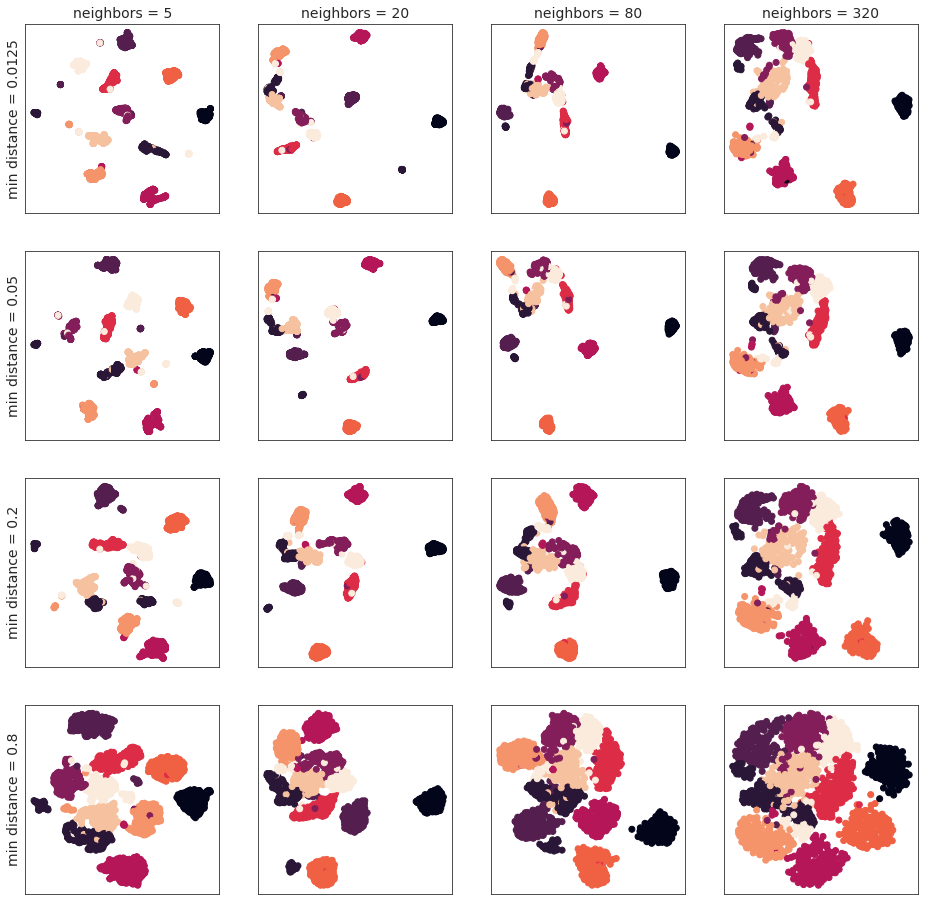

In [27]:
min_distance = [0.0125, 0.05, 0.2, 0.8]
neighbors = [5, 20, 80, 320]

fig, axs = plt.subplots(4, 4, figsize=(16, 16))
for i, d in enumerate(min_distance):
    for j, n in enumerate(neighbors): 
        if d == min_distance[0]:
          axs[i, j].set_title(f'neighbors = {n}', fontsize=14) 
        if n == neighbors[0]:
          axs[i, j].set_ylabel(f'min distance = {d}', fontsize=14) 

        umap = UMAP(n_components=2, n_neighbors=n, min_dist=d).fit_transform(pen_dig)
        axs[i,j].scatter(umap[:, 0], umap[:,1], c = pen_dig_labels.astype(int))
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])

Теперь на MNIST датасете:

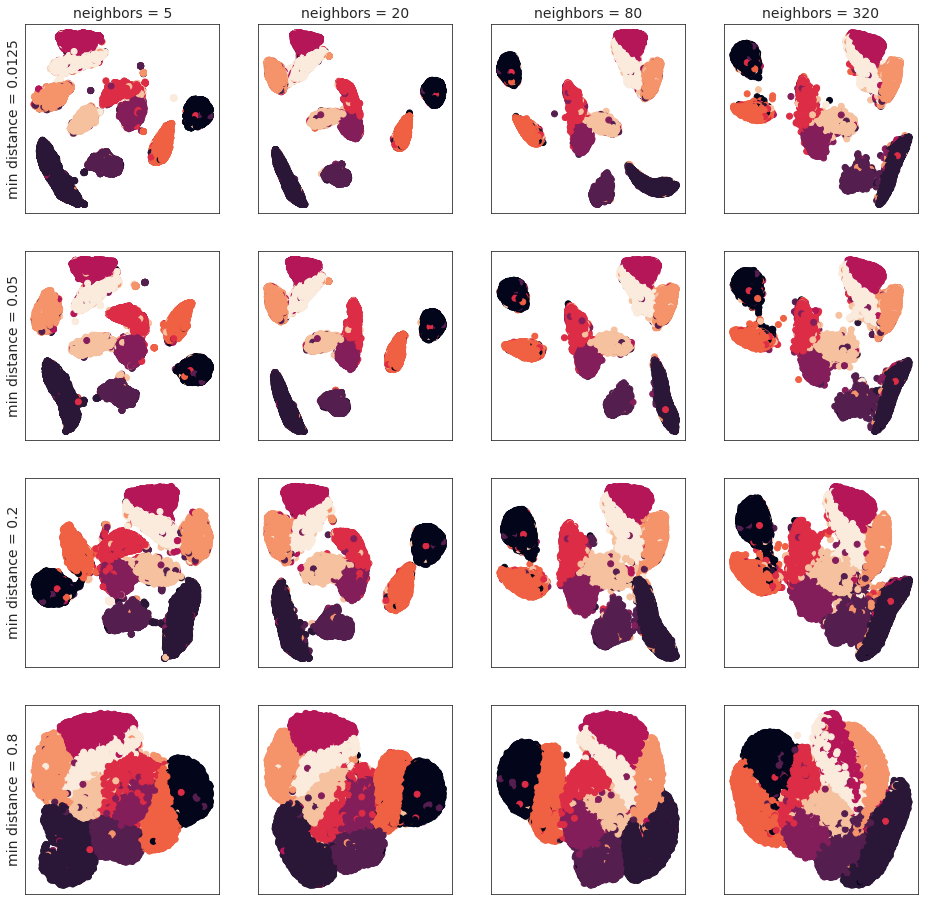

In [28]:
fig, axs = plt.subplots(4, 4, figsize=(16, 16))
for i, d in enumerate(min_distance):
    for j, n in enumerate(neighbors): 
        if d == min_distance[0]:
          axs[i, j].set_title(f'neighbors = {n}', fontsize=14) 
        if n == neighbors[0]:
          axs[i, j].set_ylabel(f'min distance = {d}', fontsize=14) 

        umap = UMAP(n_components=2, n_neighbors=n, min_dist=d).fit_transform(mnist)
        axs[i,j].scatter(umap[:, 0], umap[:,1], c = mnist_labels.astype(int))
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])

# Сравнение алгоритмов
Ниже представлены результаты работы UMAP, t-SNE, SVD и PCA методов для заданных датасетов:

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default lea

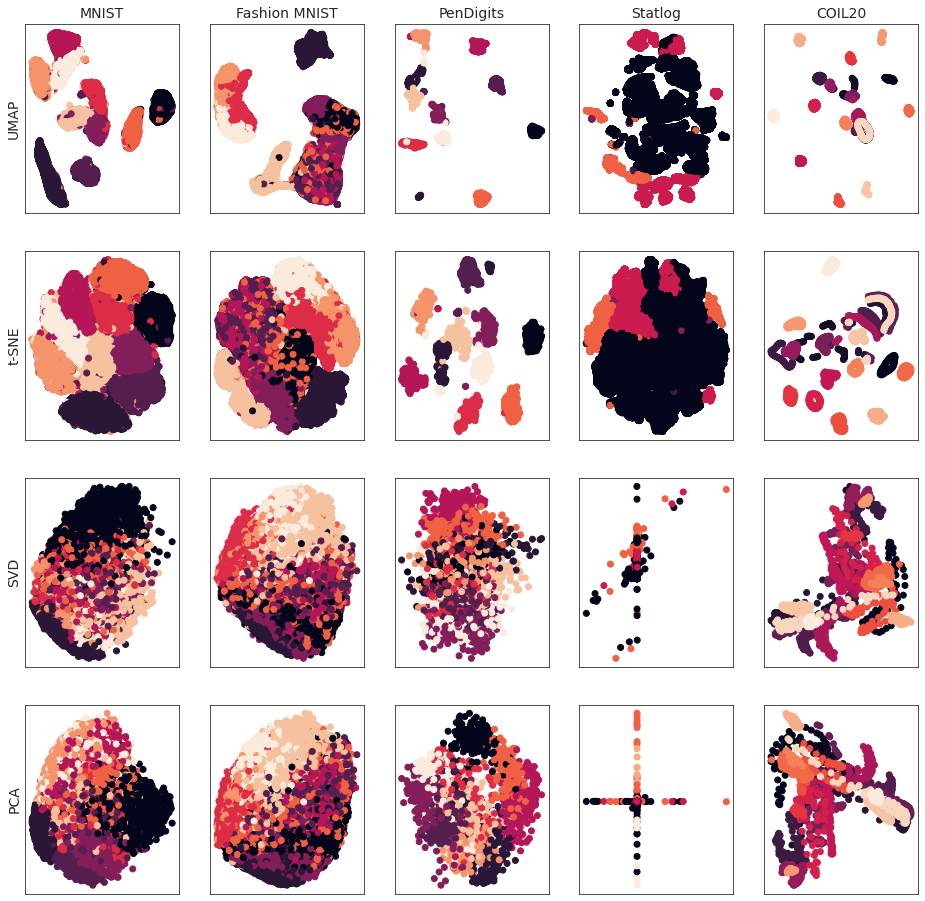

In [31]:
import time

fig, axs = plt.subplots(4, 5, figsize=(16, 16))
datasets_name = ['MNIST', 'Fashion MNIST', 'PenDigits', 'Statlog', 'COIL20']
datasets = [mnist, f_mnist, pen_dig, statlog, coil]
datasets_l = [mnist_labels, f_mnist_labels, pen_dig_labels, statlog_labels, coil_labels]
methods_name = ['UMAP', 't-SNE', 'SVD', 'PCA']
TSNE_ = TSNE(n_components=2)
UMAP_ = UMAP(n_components=2)
SVD_ = TruncatedSVD(n_components=2)
PCA_ = PCA(n_components=2)
methods = [UMAP_, TSNE_, SVD_, PCA_]

time_ = {'MNIST':{'UMAP':0, 't-SNE':0, 'SVD':0, 'PCA':0}, 
        'Fashion MNIST':{'UMAP':0, 't-SNE':0, 'SVD':0, 'PCA':0},
        'PenDigits':{'UMAP':0, 't-SNE':0, 'SVD':0, 'PCA':0},
        'Statlog':{'UMAP':0, 't-SNE':0, 'SVD':0, 'PCA':0},
        'COIL20':{'UMAP':0, 't-SNE':0, 'SVD':0, 'PCA':0}}

for j in range(0, 5):
  for i in range(0, 4):
    if j == 0:
      axs[i, j].set_ylabel(methods_name[i], fontsize=14)
    if i == 0:
      axs[i, j].set_title(datasets_name[j], fontsize=14)
    
    tic = time.perf_counter()
    embeddings = methods[i].fit_transform(X=datasets[j])
    
    time_[datasets_name[j]][methods_name[i]] = time.perf_counter() - tic

    axs[i, j].scatter(embeddings[:, 0], embeddings[:, 1], c=datasets_l[j].astype(int))
    axs[i, j].set_xticks([])
    axs[i, j].set_yticks([])


Также было решено рассмотреть различия во времени выполнения данных алгоритмов, которые представлены ниже в виде таблицы (время указано в секундах):

In [35]:
from tabulate import tabulate
table = tabulate({"Dataset":datasets_name,
                  'UMAP':[time_['MNIST']['UMAP'], time_['Fashion MNIST']['UMAP'], time_['PenDigits']['UMAP'], time_['Statlog']['UMAP'], time_['COIL20']['UMAP']],
                  't-SNE':[time_['MNIST']['t-SNE'], time_['Fashion MNIST']['t-SNE'], time_['PenDigits']['t-SNE'], time_['Statlog']['t-SNE'], time_['COIL20']['t-SNE']],
                  'SVD':[time_['MNIST']['SVD'], time_['Fashion MNIST']['SVD'], time_['PenDigits']['SVD'], time_['Statlog']['SVD'], time_['COIL20']['SVD']],
                  'PCA':[time_['MNIST']['PCA'], time_['Fashion MNIST']['PCA'], time_['PenDigits']['PCA'], time_['Statlog']['PCA'], time_['COIL20']['PCA']]},
                  headers='keys', tablefmt="psql")
print(table)

+---------------+-----------+------------+-----------+-----------+
| Dataset       |      UMAP |      t-SNE |       SVD |       PCA |
|---------------+-----------+------------+-----------+-----------|
| MNIST         |  86.7509  | 1434.63    | 4.54342   | 5.31475   |
| Fashion MNIST |  94.0821  | 1348.55    | 4.01991   | 5.57309   |
| PenDigits     |   8.86847 |   12.5884  | 0.0204678 | 0.0264482 |
| Statlog       | 100.108   |  734.765   | 0.208619  | 0.10662   |
| COIL20        |   6.81401 |    9.18303 | 0.196544  | 0.194349  |
+---------------+-----------+------------+-----------+-----------+
